In [1]:
%matplotlib inline

from scipy.integrate import odeint
import matplotlib.pyplot as plt  
import numpy as np

# Parámetros
E = 2**0.5*1/2 # CAMBIAR COMO SQRT(2)*((2N+1)/2)
m = 1

In [2]:
# Recibe un valor del eje x, el ancho tal que el potencial es diferente de cero en [-l,l] 
# y la profundidad del pozo V_0
def Pozo(x):
    
    # Ancho y profundida del pozo 
    l = 1
    V_0 = 4
    
    if x<-l or x>l:
        return V_0
    if x>=-l and x<=l:
        return 0
    
# Función de potencial de oscilador armónico. Recibe un punto en el eje x y la constante
def Oscilador(x):
    
    # Constante de elasticidad
    k = 2
    
    return (1/2)*k*x**2

    
# Función de la ecuación de Schrödinger
def psi(Psi, x, V):
    
    # Linealizando la ec. de Schrödinger
    # x_1' = x_2 = psi     
    # x_2' = (2m/hb**2)*(V(x)-E)x_1 = psi'
    
    return [Psi[1], (2*m)*(V(x) - E)*Psi[0]]




In [3]:
x0 = [0.0, 0.1]
val = np.linspace(-5,5,1000)
sol = odeint(psi, x0, val, args=(Oscilador,))


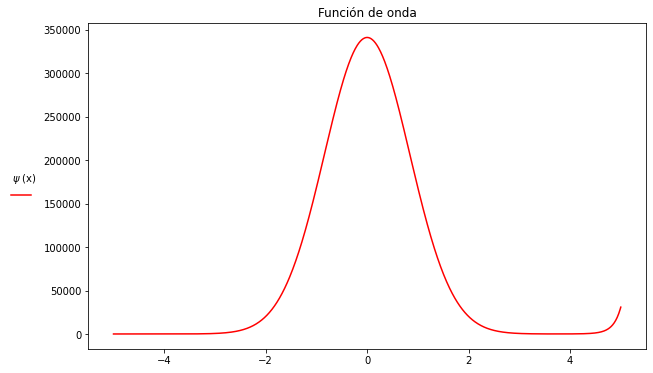

In [4]:
#Gráfica
fig = plt.figure(figsize=(10,6))
plt.plot(val,sol[:,0],color = "red",label = " " )
plt.title("Función de onda")
leg = plt.legend(title = "$\psi$ (x)  ", loc = "center", bbox_to_anchor=[-.11,.5],frameon=False)

plt.show()


In [5]:

x0 = [0.0, 0.1]
val = np.linspace(-5,5,1000)
sol = odeint(psi, x0, val, args=(Pozo,))


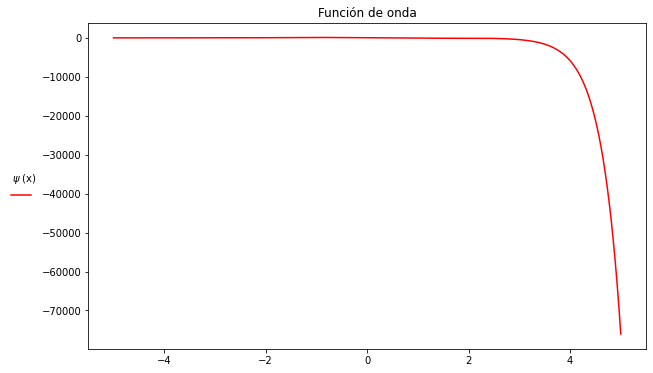

In [6]:
#Gráfica
fig = plt.figure(figsize=(10,6))
plt.plot(val,sol[:,0],color = "red",label = " " )
plt.title("Función de onda")
leg = plt.legend(title = "$\psi$ (x)  ", loc = "center", bbox_to_anchor=[-.11,.5],frameon=False)

plt.show()

Los autovalores de energía E_n son:

E_0 =  0.7071067811865476
E_1 =  2.121320343559643
E_2 =  3.5355339059327378
E_3 =  4.949747468305833


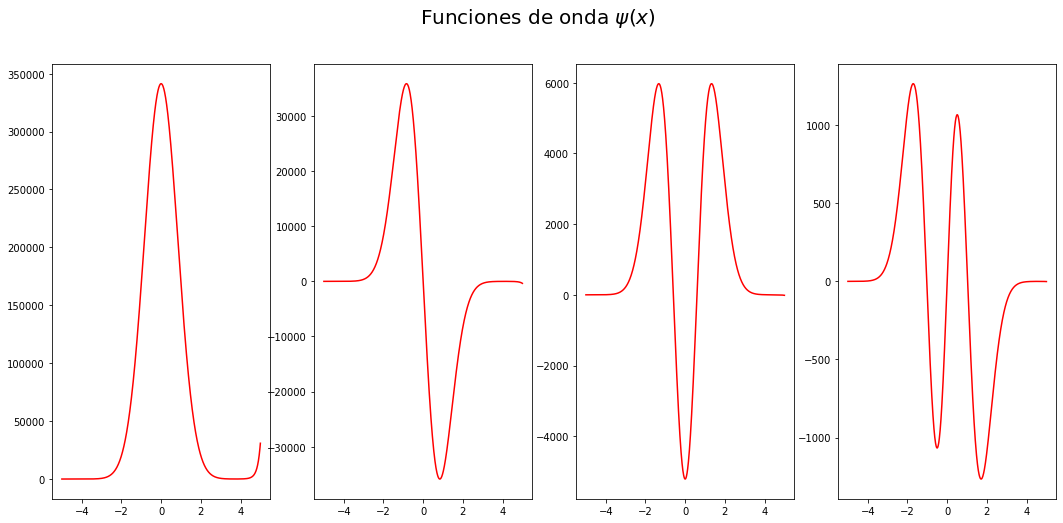

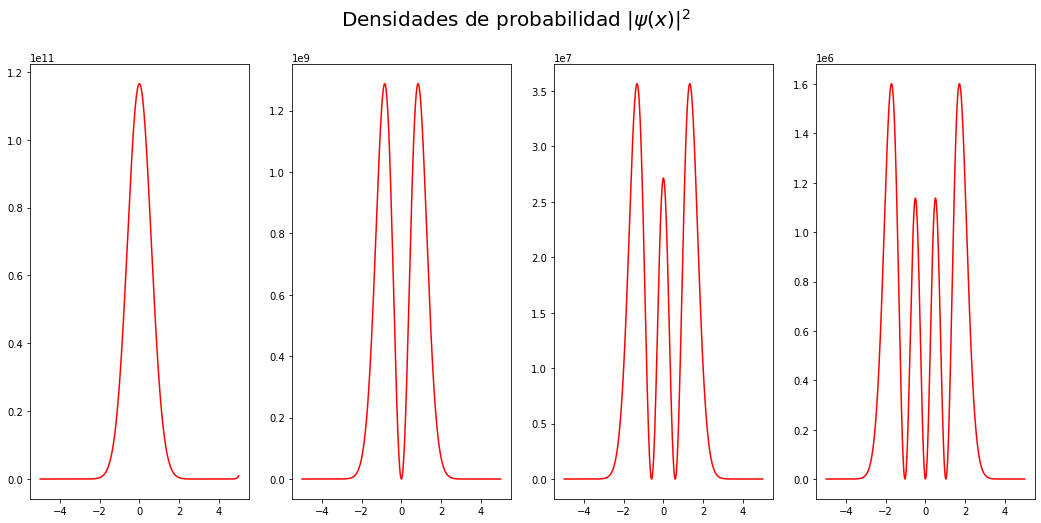

In [7]:
# Condiciones de frontera, valores nulos de la función de onda en los extremos del intervalo y 
# derivada muy cercana a cero
x0 = [0.0, 0.1]

# Intervalo de soluciṕn 
val = np.linspace(-5,5,1000)

print("Los autovalores de energía E_n son:\n")

# Figura
fig, ax = plt.subplots(1,4,figsize=(18,8))
plt.suptitle("Funciones de onda $\psi(x)$", size = '20' )

# Solución de la ec de Scrödinger. NO NORMALIZADA.

for i in range(0,4):   
    
    # Autovalor de energía
    E = 2**0.5*(i+0.5)
    print("E_%d = "%i, E)
    
    # Solución de la ecuación y gráfica
    sol = odeint(psi, x0, val, args=(Oscilador,)) 
    ax[i].plot(val,sol[:,0],color = "red",label = " " )
plt.show()  
    
# Figura
fig, ax = plt.subplots(1,4,figsize=(18,8))
plt.suptitle("Densidades de probabilidad $|\psi(x)|^2$", size = '20' )

# Densidad de probabilidad NO NORMALIZADAS

for i in range(0,4):    
    E = 2**0.5*(i+0.5)
    sol = odeint(psi, x0, val, args=(Oscilador,)) 
    ax[i].plot(val,sol[:,0]**2,color = "red",label = " " )
plt.show()  
 

Los autovalores de energía E_n son:

E_0 =  1.941936408071994
E_1 =  3.3053282724227575
E_2 =  3.7
E_3 =  3.305328272422863


<ipython-input-9-30532acaffcb>:8: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(V_0-E) - np.sqrt(E)*np.tan(np.sqrt(E/2)*2*l)
/home/usuario/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


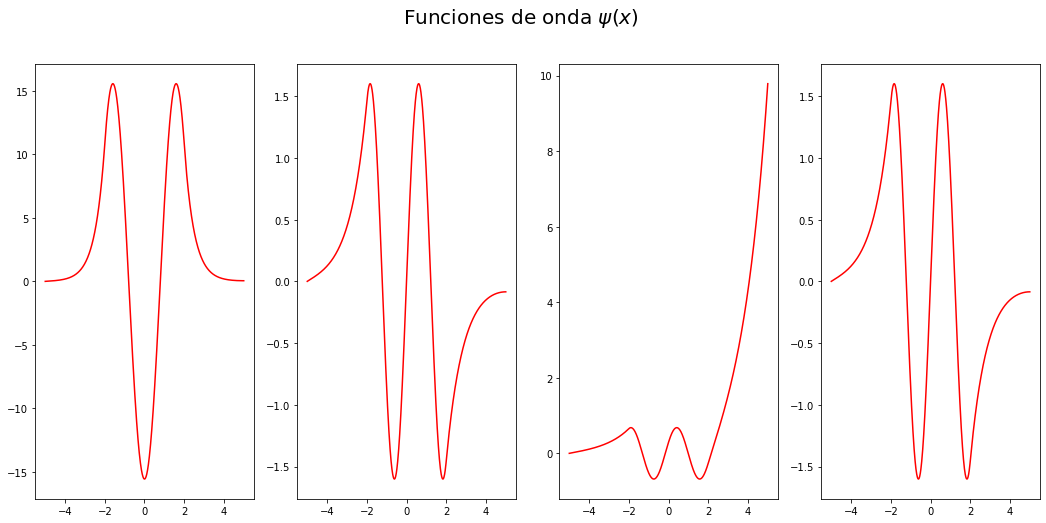

<ipython-input-9-30532acaffcb>:8: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(V_0-E) - np.sqrt(E)*np.tan(np.sqrt(E/2)*2*l)
/home/usuario/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


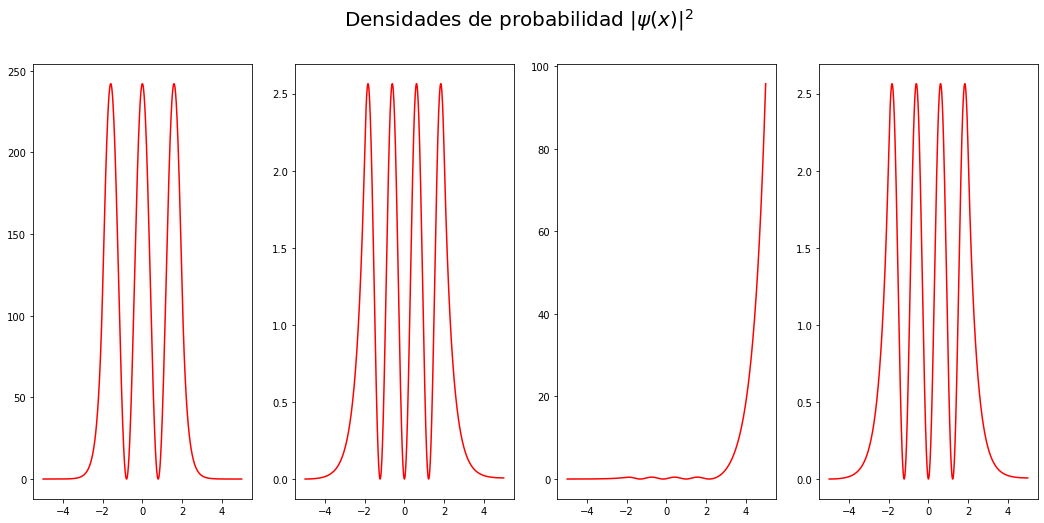

In [9]:
import scipy.optimize as scp

l = 2
V_0 = 4

# Funciones de energías para las funciones de onda simétricas y antisimétrica
def E_sym(E):
    return np.sqrt(V_0-E) - np.sqrt(E)*np.tan(np.sqrt(E/2)*2*l) 

def E_asym(E):
    return np.sqrt(V_0-E) + np.sqrt(E)*1/np.tan(np.sqrt(E/2)*2*l) 

""""
Esta parte se utiliza para hallar los guess de energías más facilmente
guess = np.arange(0,3.9,0.1)
for i in guess:
    print(scp.fsolve(E_sym, i))
    print(scp.fsolve(E_asym, i))
"""
    
# Arreglo de puntos cercanos a la solución, funcionan como guesses
GUESS = [0.5, 2.5, 3.7, 3.8]

# Condiciones iniciales e intervalo de solución
x0 = [0.0, 0.1]
val = np.linspace(-5,5,1000)

print("Los autovalores de energía E_n son:\n")

# Figura
fig, ax = plt.subplots(1,4,figsize=(18,8))
plt.suptitle("Funciones de onda $\psi(x)$", size = '20' )

# Solución de la ec de Scrödinger. NO NORMALIZADA

for i in range(0,4):
    
    #Valores de energía
    
    if i%2==0:
        E = scp.fsolve(E_sym, GUESS[i])[0]
    else:
        E = scp.fsolve(E_asym, GUESS[i])[0]
        
    print("E_%d = "%i, E)
    
    # Solución y gráfica
    sol = odeint(psi, x0, val, args=(Pozo,)) 
    ax[i].plot(val,sol[:,0],color = "red",label = " " )
plt.show() 


# Figura
fig, ax = plt.subplots(1,4,figsize=(18,8))
plt.suptitle("Densidades de probabilidad $|\psi(x)|^2$", size = '20' )

# Densidad de probabilidad. NO NORMALIZADA.
for i in range(0,4):    
    if i%2==0:
        E = scp.fsolve(E_sym, GUESS[i])[0]
    else:
        E = scp.fsolve(E_asym, GUESS[i])[0]
    sol = odeint(psi, x0, val, args=(Pozo,)) 
    ax[i].plot(val,sol[:,0]**2,color = "red",label = " " )
plt.show()  
